# Лабораторная работа № 3: Регрессионный анализ
Выполнил студент гр. 1384 Овчинников Макисм. Вариант №11

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1. Линейная регрессионная модель

    $Y = X^T\beta + \varepsilon$ , $\mathbb{E_{\theta}\varepsilon} = 0$ , $Var_{\theta} \varepsilon = \sigma^{2}\mathbb{E}$
    
    $X^T$ - регрессоры (факторы модели)
   
    $\beta$ - параметры регрессии
    
    $\varepsilon$ - случайная ошибка

2. МНК
    
    $RSS(\beta) = || Y - X^T\beta ||^2 \rightarrow min_{\beta}$
    
    Нормальные уравнения
    
    $XX^T\beta = XY$
    
    Решение системы нормальных уравнений в регулярном случае
    
    $\widehat\beta = (XX^T)^{-1}XY$ , $\beta = (\beta_{0}, \beta_{1})$

3. Несмещенная оценка дисперсии

    $s^2 = \frac{RSS(\widehat\beta)}{n-r} = \frac{(Y-X^T\widehat\beta)^T(Y-X^T\widehat\beta)}{n-r}$
    
    $r - rankX$

4. Доверительный интервал

    ДНО-функция $\Psi = C^T\beta$

    МНК-оценка $\widehat{\Psi} = C^T \widehat{\beta}$
    
    $b_{\Psi} = C^{T}(XX^T)^{-1}C$
    
    $\widehat{\Psi} \sim \mathcal{N}(\Psi, \sigma^{2}b)$
    
    $\frac{\widehat{\Psi} - \Psi}{s\sqrt{b}} \sim S_{n-r}$
    
    Доверительный интервал уровня доверия 1 - $\alpha$
    
    $ \Psi \in \left[ \widehat{\Psi} - x_{\alpha}s\sqrt{b}, \widehat{\Psi} + x_{\alpha}s\sqrt{b} \right]$ 
    
    где $x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$
    
5. Доверительный эллипсоид уровня доверия $1 - \alpha$
    
    $A_{\alpha} = \{ \vec{x}: (\vec{x} - \widehat{\Psi})^{T} b_{\Psi}^{-1} (\vec{x} - \widehat{\Psi})  \le qs^{2}x_{\alpha}\}$
   
    $\widehat{\Psi}$ - вектор оценок 
   
    $b_{\Psi}$ - матрица оценок ковариации
   
    $s^2$ - оценка дисперсии

    $q$ - пороговая точка, связанная с распределением $\mathcal{X}_{n-r}^2$
   
    $x_{\alpha}$ - значение функции распредления $\mathcal{X}_{n-r}^2$ с уровнем доверия $1 - \alpha$ 

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alpha = 0.1
h = 2.5
size = 50


X = np.array([3, 5, 0, 3, 2, 5, 3, 4, 4, 5, 4, 5, 2, 6, 3, 5, 2, 7, 8, 7, 2, 6, 5, 4, 5, 2, 3, 4, 5, 0, 6, 4, 4, 1, 2, 7, 4, 0, 0, 7, 6, 6, 4, 2, 4, 7, 2, 4, 4, 0])
Y = np.array([10.30, 8.68, 4.02, 8.07, 16.76, 8.98, 10.78, 13.23, 16.36, 12.46, 15.56, 21.63, 15.71, 10.65, 2.74, 8.84, 14.63, 13.66, 19.29, 18.95, 14.79, 6.98, 11.38, 17.57, 8.00, 19.71, 13.48, 2.73, 14.36, 10.14, 14.13, 4.79, 10.27, 12.19, 14.34, 9.80, 12.30, 23.59, 18.59, 15.79, 14.01, 11.01, 15.12, 11.04, 6.05, 1.22, 5.30, 16.89, 14.84, 22.32])


#### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_{0}$ и масштаба $\beta_{1}$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки. 

Построим графически результаты эксперимента

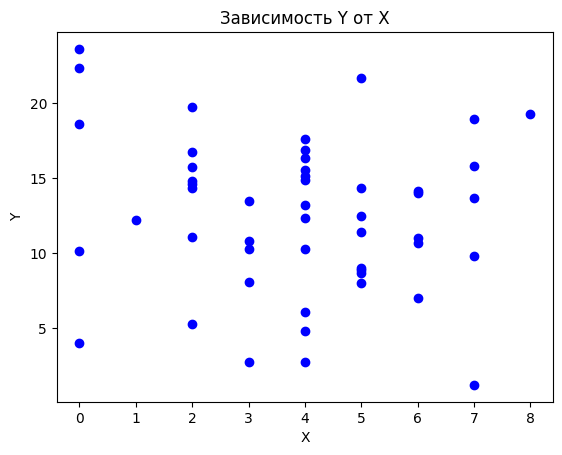

In [306]:
plt.scatter(X,Y, color='blue')
plt.title('Зависимость Y от X')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Сформулируем линейную регрессионную модель

$Y = X^T\beta + \varepsilon$ , $\mathbb{E_{\theta}\varepsilon} = 0$ , $Var_{\theta} \varepsilon = \sigma^{2}\mathbb{E}$

МНК

$RSS(\beta) = || Y - X^T\beta ||^2 \rightarrow min_{\beta}$

Нормальные уравнения

$XX^T\beta = XY$

Решение

$\widehat\beta = (XX^T)^{-1}XY$ , $\beta = (\beta_{0}, \beta_{1})$

beta_0 = 13.751499859826176, beta_1 = -0.3292486683487527


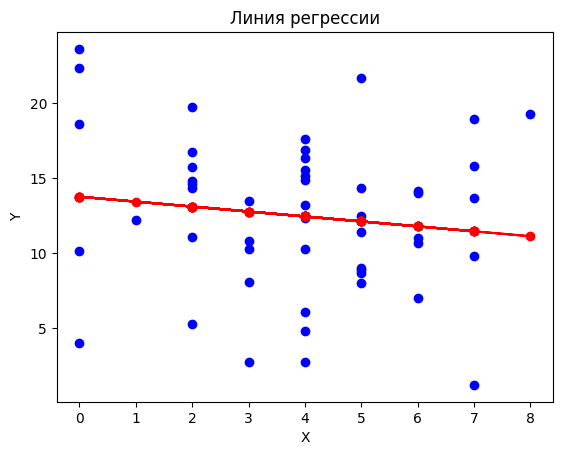

In [307]:
X_matrix = np.array([[1 for i in range(size)], X])
Y_matrix = Y

XXT = np.dot(X_matrix, X_matrix.T)
XXT_inv = np.linalg.inv(XXT)

beta = np.dot(XXT_inv, np.dot(X_matrix, Y_matrix))

print(f'beta_0 = {beta[0]}, beta_1 = {beta[1]}')

# вычисление координат линии
regression_line = np.dot(X_matrix.T, beta);

plt.scatter(X, Y, color='blue')
plt.plot(X, regression_line, marker='o', linestyle='-', color='red')
plt.title('Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


#### 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии

$s^2 = \frac{RSS(\widehat\beta)}{n-r} = \frac{(Y-X^T\widehat\beta)^T(Y-X^T\widehat\beta)}{n-r}$

$r = rank X = 2$

In [308]:
s = np.dot((Y_matrix - np.dot(X_matrix.T, beta)).T, (Y - np.dot(X_matrix.T, beta))) / (size - 2)
print(f'Оценка дисперсии s^2 = {s}')

Оценка дисперсии s^2 = 26.8721148163723


Построим гистограмму с шагом h на базе ошибок


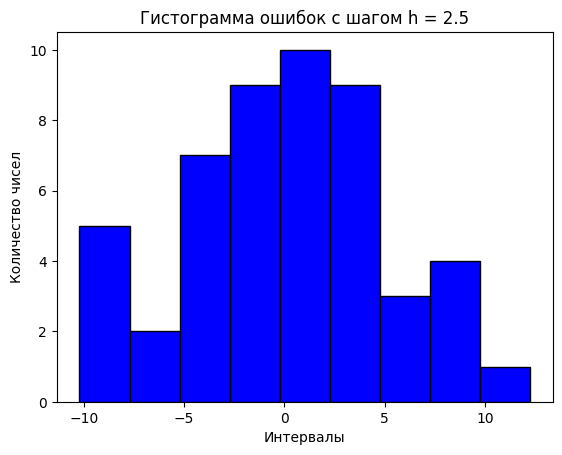

In [309]:
errors = Y - np.dot(X_matrix.T, beta)

plt.title(f'Гистограмма ошибок с шагом h = {h}')
plt.ylabel('Количество чисел')
plt.xlabel('Интервалы')

hist, bins, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), edgecolor='black', color='blue')

Проверим гипотезу нормальности ошибок на уровне значимости $\alpha = 0.1$ по $\chi^2$ с помощью критерия согласия Пирсона

$H_0: \vec{\varepsilon} \sim \mathcal{N}(0, \sigma^{2})$

Разобъем ошибки на интервалы

$I_1 = (-\infty, -5.2], n_1 = 7$

$I_2 = (-5.2, -2.7], n_2 = 7$

$I_3 = (-2.7, -0.2], n_3 = 9$

$I_4 = (-0.2, 2.3], n_4 = 10$

$I_5 = (2.3, 4.7], n_5 = 9$

$I_6 = (4.7, +\infty], n_6 = 8$

In [310]:
right_endpoints = [-5.2, -2.7, -0.2, 2.3, 4.7]
n_i = [7, 7, 9, 10, 9, 8]

p = [0] * (len(right_endpoints) + 1)

p[0] = stats.norm.cdf(right_endpoints[0], 0, s)

for i in range(1, len(right_endpoints)):
    p[i] = stats.norm.cdf(right_endpoints[i], 0, s) - stats.norm.cdf(right_endpoints[i - 1], 0, s)
    
p[len(right_endpoints)] = 1 - stats.norm.cdf(right_endpoints[-1], 0, s)


X2 = 0

for i in range(len(p)):
    X2 += (n_i[i] - size * p[i])**2 / (size * p[i])


x_a = stats.chi2(6 - 1).ppf(1 - alpha)
print(f'X^2 = {X2}')
print(f'x_a = {x_a}')

print(f'p-value = {1 - stats.chi2.cdf(X2, 5)}')

X^2 = 125.53276067380395
x_a = 9.236356899781123
p-value = 0.0


$\mathcal{X^2} > x_\alpha \rightarrow$ отвергаем гипотезу $H_0$

Наибольшие уровень значимости, при котором нет основания отвергнуть гипотезу очень близок к 0

Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову


In [311]:
D, p_value = stats.kstest(errors, 'norm', args=(np.mean(errors), np.sqrt(s)))

print(f'D = {D}')
print(f'p-value={ p_value}')



D = 0.06529238830466799
p-value=0.9739964800800018


Поскольку p-value (0.974) больше уровня значимости $\alpha = 0.1 \rightarrow$ принимаем гипотезу $H_0$ 

Визуально можно заметить, что график широкий и низкий, что соответствует полученному ско, однако левый и правый хвосты распределения сильно различны. Критерий согласия Пирсона отклонил гипотезу о нормальности распределения ошибок на уровне $\alpha$, тест Колмогорова принял гипотезу

#### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$. (вычислить его полуоси)

ДНО-функция $\Psi = C^T\beta$

МНК-оценка $\widehat{\Psi} = C^T \widehat{\beta}$

$b_{\Psi} = C^{T}(XX^T)^{-1}C$

$\widehat{\Psi} \sim \mathcal{N}(\Psi, \sigma^{2}b)$

$\frac{\widehat{\Psi} - \Psi}{s\sqrt{b}} \sim S_{n-r}$

Доверительный интервал уровня доверия 1 - $\alpha$

$ \Psi \in \left[ \widehat{\Psi} - x_{\alpha}s\sqrt{b}, \widehat{\Psi} + x_{\alpha}s\sqrt{b} \right]$ 

где $x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

Построим доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$

In [312]:
C_0 = np.array([1,0])
C_1 = np.array([0,1])

XXT_inv = np.linalg.inv(np.dot(X_matrix, X_matrix.T))

b_0 = np.dot(np.dot(C_0.T, XXT_inv), C_0)
b_1 = np.dot(np.dot(C_1.T, XXT_inv), C_1)

x_alpha = stats.t(size-2).ppf(1 - alpha / 2)

product_0 = x_alpha * np.sqrt(s) * np.sqrt(b_0) 
product_1 = x_alpha * np.sqrt(s) * np.sqrt(b_1)
print(f'Доверительный интервал для beta_0 [{beta[0] - product_0}, {beta[0] + product_0}]')
print(f'Доверительный интервал для beta_1 [{beta[1] - product_1}, {beta[1] + product_1}]')

Доверительный интервал для beta_0 [11.148709655336509, 16.354290064315844]
Доверительный интервал для beta_1 [-0.9235611648633544, 0.265063828165849]


Построим доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$ и вычислим его полуоси

Доверительный эллипсоид уровня доверия 1 - $\alpha$

Функция параметра $\Psi$

$A_{\alpha} = \{ \vec{x}: (\vec{x} - \widehat{\Psi})^{T} b_{\Psi}^{-1} (\vec{x} - \widehat{\Psi})  \le qs^{2}x_{\alpha}\}$

где $x_{\alpha}: F_{q, n - r} (x_{\alpha}) = 1 - \alpha$ 

$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$

$\frac{\lambda_1}{qs^2x_\alpha}x^2 + \frac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

Найдем собственные числа, собственные векторы и полуоси эллипса

In [313]:
eigenvalues, eigenvectors = np.linalg.eig(XXT)
q = 2
print(f'Собственные числа:\n{eigenvalues}')
print(f'Собственные векторы:\n{eigenvectors}')
print(f'beta={beta}')

x_alpha = stats.f(2, size - 2).ppf(1 - alpha)

a = np.sqrt((q * s * x_alpha) / eigenvalues[0])
b = np.sqrt((q * s * x_alpha) / eigenvalues[1])

print(f'Большая полуось: {a}')
print(f'Малая полуось: {b}')

Собственные числа:
[ 10.71943133 998.28056867]
Собственные векторы:
[[-0.97991054 -0.19943753]
 [ 0.19943753 -0.97991054]]
beta=[13.75149986 -0.32924867]
Большая полуось: 3.480870245950278
Малая полуось: 0.36070104370427875


$ 
\begin{pmatrix} x\\ y \end{pmatrix} = \begin{pmatrix} -0.97991054  && -0.19943753 \\ 0.19943753 && -0.97991054 \end{pmatrix} \cdot \begin{pmatrix} 13.75149986 - \beta_0 \\  -0.32924867 - \beta_1 \end{pmatrix} = \begin{pmatrix} -13.409574 + 0.979910\beta_0 + 0.199437\beta_1 \\ 2.419930 - 0.199437\beta_0 - 0.979910\beta_1 \end{pmatrix}
$

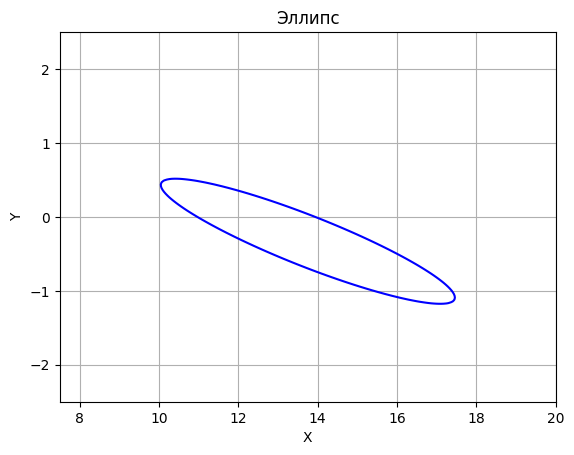

In [314]:
def ellipse_equation(beta_0, beta_1):
    return ((-13.409574 + 0.979910 * beta_0 + 0.199437 * beta_1)**2 / a**2) + ((2.419930 - 0.199437 * beta_0 - 0.979910 * beta_1)**2 / b**2)


x = np.linspace(7.5, 20, 200)
y = np.linspace(-2.5, 2.5, 200)
X_, Y_ = np.meshgrid(x,y)

plt.contour(X_,Y_, ellipse_equation(X_,Y_), levels=[1], colors='blue')
plt.title("Эллипс")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

#### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости

$H_0$: $\beta_1 = 0$ - переменные не зависимы

$H_1$: $\beta_1 \ne 0, $ - переменные зависимы

ДНО-функция: $\Psi = C^T\beta$

$C^T = \begin{pmatrix} 0 && 1 \end{pmatrix}$

МНК-оценка:  $\widehat{\Psi} = C^T\widehat{\beta} = \begin{pmatrix} 0 && 1  \end{pmatrix} \begin{pmatrix} 13.75149986 \\-0.32924867 \end{pmatrix} = -0.32924867$

Статистика: $F = \frac{\widehat{\Psi}^TB^{-1}\widehat{\Psi}}{qs^2} \sim \mathcal{F}_{q, n-r}$

$x_{\alpha}: \mathcal{F}_{q, n - r } = 1 - \alpha$

In [315]:

x_alpha = stats.f(1, size - 2).ppf(1 - alpha)
print(f'x-alpha = {x_alpha}')

C = np.array([0, 1])
Psi = -0.32924867

B_int = np.dot(np.dot(C.T, XXT_inv), C)
F = np.dot(np.dot(Psi, B_int), Psi) / 3 * s
print(f'F = {F}')
print(f'Наибольший уровень значимости, при котором еще нельзя отвергнуть гипотезу = {1 - stats.f.cdf(F, 1, size - 2)}')

x-alpha = 2.813081004064934
F = 0.004537057576470173
Наибольший уровень значимости, при котором еще нельзя отвергнуть гипотезу = 0.9465767520635953


Поскольку $F < x_{\alpha} \rightarrow$ гипотеза $H_0$ принимается

#### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Сформулируем линейную регрессионную модель

$Y = X^T\beta + \varepsilon$ , $\mathbb{E_{\theta}\varepsilon} = 0$ , $Var_{\theta} \varepsilon = \sigma^{2}\mathbb{E}$

МНК

$RSS(\beta) = || Y - X^T\beta ||^2 \rightarrow min_{\beta}$

Нормальные уравнения

$XX^T\beta = XY$

Решение

$\widehat\beta = (XX^T)^{-1}XY$ , $\beta = (\beta_{0}, \beta_{1}, \beta_{2})$

[15.98643415 -2.11601043  0.24306393]
beta_0 = 15.986434154597848, beta_1 = -2.116010426480604, beta_2=0.24306392552749004


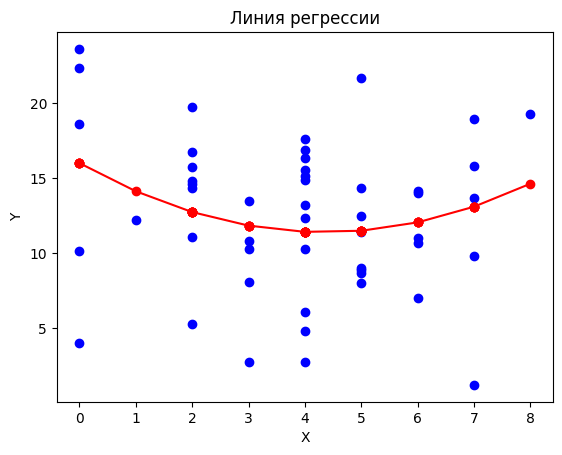

In [316]:
X_matrix = np.array([[1 for i in range(size)], X, [i*i for i in X]])
Y_matrix = Y

XXT = np.dot(X_matrix, X_matrix.T)
XXT_inv = np.linalg.inv(XXT)

beta = np.dot(XXT_inv, np.dot(X_matrix, Y_matrix))
print(beta)
print(f'beta_0 = {beta[0]}, beta_1 = {beta[1]}, beta_2={beta[2]}')

# вычисление координат линии
X_matrix_sorted = np.array([[1 for i in range(size)], sorted(X), [i*i for i in sorted(X)]])

regression_line = np.dot(X_matrix_sorted.T, beta);


plt.scatter(X, Y, color='blue')
plt.plot(sorted(X), regression_line, marker='o', linestyle='-', color='red')
plt.title('Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


#### 6. Построить несмещенную оценку оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2

Несмещенная оценка дисперсии

$s^2 = \frac{RSS(\widehat\beta)}{n-r} = \frac{(Y-X^T\widehat\beta)^T(Y-X^T\widehat\beta)}{n-r}$

$r = rank X = 3$


In [317]:
s = np.dot((Y_matrix - np.dot(X_matrix.T, beta)).T, (Y - np.dot(X_matrix.T, beta))) / (size - 3)
print(f'Оценка дисперсии s^2 = {s}')

Оценка дисперсии s^2 = 25.89979390583285


Построим гистограмму с шагом h на базе ошибок


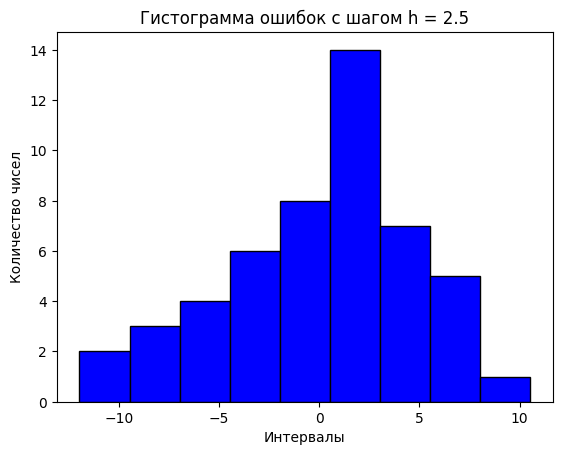

In [318]:
errors = Y - np.dot(X_matrix.T, beta)

plt.title(f'Гистограмма ошибок с шагом h = {h}')
plt.ylabel('Количество чисел')
plt.xlabel('Интервалы')

hist, bins, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), edgecolor='black', color='blue')


Проверим гипотезу нормальности ошибок на уровне значимости $\alpha = 0.1$ по $\chi^2$ с помощью критерия согласия Пирсона

$H_0: \vec{\varepsilon} \sim \mathcal{N}(0, \sigma^{2})$

Разобъем ошибки на интервалы

$I_1 = (-\infty, -4.6], n_1 = 9$

$I_2 = (-4.6, -2], n_2 = 6$

$I_3 = (-2, 0.5], n_3 = 8$

$I_4 = (0.5, 3], n_4 = 14$

$I_5 = (3, 5.5], n_5 = 7$

$I_6 = (5.5, +\infty], n_6 = 6$

In [319]:
right_endpoints = [-4.6, -2.0, 0.5, 3, 5.5]
n_i = [9, 6, 8, 14, 7, 6]

p = [0] * (len(right_endpoints) + 1)

p[0] = stats.norm.cdf(right_endpoints[0], 0, s)

for i in range(1, len(right_endpoints)):
    p[i] = stats.norm.cdf(right_endpoints[i], 0, s) - stats.norm.cdf(right_endpoints[i - 1], 0, s)
    
p[len(right_endpoints)] = 1 - stats.norm.cdf(right_endpoints[-1], 0, s)


X2 = 0

for i in range(len(p)):
    X2 += (n_i[i] - size * p[i])**2 / (size * p[i])


x_a = stats.chi2(6 - 1).ppf(1 - alpha)
print(f'X^2 = {X2}')
print(f'x_a = {x_a}')

print(f'p-value = {1 - stats.chi2.cdf(X2, 5)}')

X^2 = 134.77369362153487
x_a = 9.236356899781123
p-value = 0.0


$\mathcal{X^2} > x_\alpha \rightarrow$ отвергаем гипотезу $H_0$

Наибольшие уровень значимости, при котором нет основания отвергнуть гипотезу очень близок к 0

Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову

In [320]:
D, p_value = stats.kstest(errors, 'norm', args=(np.mean(errors), np.sqrt(s)))

print(f'D = {D}')
print(f'p-value={ p_value}')

D = 0.10438264678646902
p-value=0.6099090676932604


Поскольку p-value (0.974) больше уровня значимости $\alpha = 0.1 \rightarrow$ принимаем гипотезу $H_0$ 

Визуально можно заметить, что высота графика немного больше, чем у реального нормального распределения, так-же можно заметить, что график немного сдвинут вправо от мат. ожидания = 0,. Критерий согласия Пирсона отклонил гипотезу о нормальности распределения ошибок на уровне $\alpha$, тест Колмогорова принял гипотезу

#### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 − \alpha$. Написать уравнение доверительного эллипсоида уровня доверия 1 − $\alpha$


ДНО-функция $\Psi = C^T\beta$

МНК-оценка $\widehat{\Psi} = C^T \widehat{\beta}$

$b_{\Psi} = C^{T}(XX^T)^{-1}C$

$\widehat{\Psi} \sim \mathcal{N}(\Psi, \sigma^{2}b)$

$\frac{\widehat{\Psi} - \Psi}{s\sqrt{b}} \sim S_{n-r}$

Доверительный интервал уровня доверия 1 - $\alpha$

$ \Psi \in \left[ \widehat{\Psi} - x_{\alpha}s\sqrt{b}, \widehat{\Psi} + x_{\alpha}s\sqrt{b} \right]$ 

где $x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

Построим доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия 1 − $\alpha$

In [321]:
C_0 = np.array([1,0,0])
C_1 = np.array([0,1,0])
C_2 = np.array([0,0,1])
XXT_inv = np.linalg.inv(np.dot(X_matrix, X_matrix.T))

b_0 = np.dot(np.dot(C_0.T, XXT_inv), C_0)
b_1 = np.dot(np.dot(C_1.T, XXT_inv), C_1)
b_2 = np.dot(np.dot(C_2.T, XXT_inv), C_2)

x_alpha = stats.t(size-3).ppf(1 - alpha / 2)

product_0 = x_alpha * np.sqrt(s) * np.sqrt(b_0) 
product_1 = x_alpha * np.sqrt(s) * np.sqrt(b_1)
product_2 = x_alpha * np.sqrt(s) * np.sqrt(b_2)
print(f'Доверительный интервал для beta_0 [{beta[0] - product_0}, {beta[0] + product_0}]')
print(f'Доверительный интервал для beta_1 [{beta[1] - product_1}, {beta[1] + product_1}]')
print(f'Доверительный интервал для beta_3 [{beta[2] - product_2}, {beta[2] + product_2}]')

Доверительный интервал для beta_0 [12.58735312744365, 19.385515181752048]
Доверительный интервал для beta_1 [-3.9997678504085377, -0.2322530025526699]
Доверительный интервал для beta_3 [-0.0005821984386185086, 0.4867100494935986]


Напишем уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

Функция параметра $\Psi$

$A_{\alpha} = \{ \vec{x}: (\vec{x} - \widehat{\Psi})^{T} B_{\Psi}^{-1} (\vec{x} - \widehat{\Psi})  \le qs^{2}x_{\alpha}\}$

где $x_{\alpha}: F_{q, n - r} (x_{\alpha}) = 1 - \alpha$ 

$C = \begin{pmatrix}
    1 & 0 & 0\\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2\le qs^2x_\alpha$

$\frac{\lambda_1}{qs^2x_\alpha}x^2 + \frac{\lambda_2}{qs^2x_\alpha}y^2 + \frac{\lambda_3}{qs^2x_\alpha}z^2\le 1$, где $\lambda_1$, $\lambda_2$, $\lambda_3$ - собственные числа матрицы $XX^T$

Найдем собственные числа и собственные векторы 

In [322]:
eigenvalues, eigenvectors = np.linalg.eig(XXT)
q = 3
print(f'Собственные числа:\n{eigenvalues}')
print(f'Собственные векторы:\n{eigenvectors}')
print(f'beta={beta}')

x_alpha = stats.f(3, size - 3).ppf(1 - alpha)

print(f'x_alpha = {x_alpha}')

Собственные числа:
[3.21108990e+04 5.11796685e+00 7.99830030e+01]
Собственные векторы:
[[-0.03048303 -0.89334079 -0.44834475]
 [-0.16706093  0.44679717 -0.87889871]
 [-0.98547523 -0.04810939  0.16286207]]
beta=[15.98643415 -2.11601043  0.24306393]
x_alpha = 2.2041823911022664


Напишем уравнение эллипсоида

$ \begin{pmatrix} x\\ y \\ z \end{pmatrix} = \begin{pmatrix} -0.03048303 && -0.89334079 && -0.44834475 \\ -0.16706093  && 0.44679717 && -0.87889871 \\ -0.98547523 && -0.04810939 && 0.16286207 \end{pmatrix} \cdot \begin{pmatrix} 15.98643415 - \beta_0 \\  
 -2.11601043 - \beta_1 \\ 0.24306393 -\beta_2 \end{pmatrix}$
 

$\frac{3211.08990}{3 \cdot 25.89979390583285 \cdot 2.2041823911022664}x^2 + \frac{5.11796685}{3 \cdot 25.89979390583285 \cdot 2.2041823911022664}y^2 + \frac{79.9830030}{3 \cdot 25.89979390583285 \cdot 2.2041823911022664}z^2 \le 1$



#### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить ее значимость на уровне $\alpha$

$H_0$: $\beta_1 = 0, \beta_2 = 0$ - переменные не зависимы

$H_1$: $\beta_1 \ne 0, \beta_2 \ne 0$ - переменные зависимы

ДНО-функция: $\Psi = C^T\beta$

$C^T = \begin{pmatrix} 0 && 1 && 0 \\ 0 && 0 && 1 \end{pmatrix}$

МНК-оценка:  $\widehat{\Psi} = C^T\widehat{\beta} = \begin{pmatrix} 0 && 1 && 0 \\ 0 && 0 && 1 \end{pmatrix} \begin{pmatrix} 15.98643415 \\ -2.11601043 \\ 0.24306393\end{pmatrix} = \begin{pmatrix} -2.11601043 \\ 0.24306393 \end{pmatrix}$

Статистика: $F = \frac{\widehat{\Psi}^TB^{-1}\widehat{\Psi}}{qs^2} \sim \mathcal{F}_{q, n-r}$

$x_{\alpha}: \mathcal{F}_{q, n - r } = 1 - \alpha$

In [323]:

x_alpha = stats.f(2, size - 3).ppf(1 - alpha)
print(f'x-alpha = {x_alpha}')

C = np.array([[0, 0], [1, 0], [0, 1]])
Psi = np.array([-2.11601043, 0.24306393])

B_int = np.dot(np.dot(C.T, XXT_inv), C)
F = np.dot(np.dot(Psi.T, B_int), Psi) / 3 * s
print(f'F = {F}')
print(f'Наибольший уровень значимости, при котором еще нельзя отвергнуть гипотезу = {1 - stats.f.cdf(F, 2, size - 3)}')


x-alpha = 2.419167827102904
F = 1.934688610665429
Наибольший уровень значимости, при котором еще нельзя отвергнуть гипотезу = 0.1558022676656745


Поскольку $F < x_{\alpha} \rightarrow$ гипотеза $H_0$ принимается

## Выводы
В ходе лабораторной работы были освоены основные положения метода наименьших квадратов (МНК), статистические свойства МНК-оценок, понятия функции регрессии и роли МНК в регрессионном анализе. Были сформулированны линейные регрессионные модели, построены линии регрессии, несмещенные оценки дисперсии, гистограммы с шагом $h = 2.5$, проверены гипотезы нормальности ошибок с помощью критерия Пирсона и критерия Колмогорова, построены доверительные интервалы для параметров уровня доверия $1 - \alpha$, доверительный эллипс уровня доверия $1-\alpha$, сформулирована и проверена гипотеза независимой переменной $Y$ от переменной $X$.


